<a href="https://colab.research.google.com/github/AuFeld/Project2/blob/master/notebooks/Project_2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
DATA_PATH = 'Project_2_Data.xlsx'

In [162]:
!pip install category_encoders==2.*
!pip install pdpbox
!pip install shap
!pip install eli5
!pip install pandas-profiling==2.*

In [0]:
# import libraries
import pandas as pd
import pandas_profiling
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
import eli5
from eli5.sklearn import PermutationImportance

In [0]:
df = pd.read_excel(DATA_PATH)

In [165]:
df.head()

,Club,Season,GW_Played,Goals_Scored,Goals_Conceded,Goal_Difference,Expenditure,Income,Net,Points,Points_per_GW,Expenditure_per_Point_per_GW,Manager,Owner,Champion,Relegated
0,LIV,2019,18,46,14,32,-2.17,47.42,45.25,49,2.722222,-0.797143,Klopp,Fenway,False,False
1,LEI,2019,19,41,18,23,-120.95,99.52,-21.43,39,2.052632,-58.924359,Rodgers,King_Power,False,False
2,MCI,2019,19,50,20,30,-191.52,78.66,-112.86,38,2.000000,-95.760000,Guardiola,City_Football,False,False
3,CHE,2019,19,33,27,6,-51.30,166.16,114.86,32,1.684211,-30.459375,Lampard,Abramovich,False,False
4,SHU,2019,19,23,17,6,-54.15,0.00,-54.15,28,1.473684,-36.744643,Wilder,Al_Saud,False,False


In [0]:
# choose your target. which column in will you predict? 
# target: 2019 Champion

In [167]:
df['Champion'].value_counts()

False    476
True      24
Name: Champion, dtype: int64

In [0]:
# baseline

mode = 'False'

In [0]:
# regression or classification?
# classification

In [0]:
# evaluation metrics: accuracy

In [0]:
columns = ['Club', 'Season', 'GW_Played', 'Goals_Scored', 'Goals_Conceded', 
           'Goal_Difference', 'Expenditure', 'Income', 'Net', 'Points', 
           'Points_per_GW', 'Expenditure_per_Point_per_GW', 'Manager', 'Owner', 
           'Champion', 'Relegated']

In [0]:
# split data by season

train = df[df['Season'] < 2018]
val = df[df['Season'] == 2018]
test = df[df['Season'] == 2019]

In [173]:
train.shape, val.shape, test.shape

((460, 16), (20, 16), (20, 16))

In [174]:
train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
Champion,460,2,False,437
Relegated,460,2,False,391
Club,460,47,MAN,23
Owner,460,66,ITV_plc,23
Manager,460,136,Wenger,23


In [0]:
high_cardinality = ['Manager', 'Owner', 'Club', 'Relegated', 'Champion']

In [176]:
# null values?
df.isna().sum()

Club                            0
Season                          0
GW_Played                       0
Goals_Scored                    0
Goals_Conceded                  0
Goal_Difference                 0
Expenditure                     0
Income                          0
Net                             0
Points                          0
Points_per_GW                   0
Expenditure_per_Point_per_GW    0
Manager                         0
Owner                           0
Champion                        0
Relegated                       0
dtype: int64

In [0]:
# assign variables
target = 'Champion'
features = df.columns.drop([target])

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

In [0]:
# target distribution

In [0]:
y=df['Champion']

In [180]:
y.nunique()

2

In [181]:
y.value_counts(normalize=True).max()

0.952

In [0]:
# Features Importance

In [183]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.95


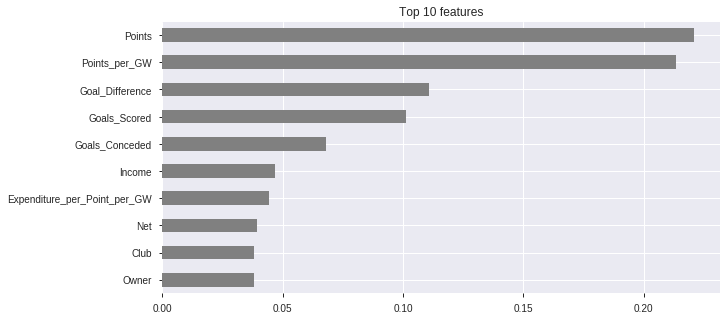

In [184]:
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [0]:
# observation: Goals Scored has a higher importance re Champion

In [0]:
# The $125m question - RELEGATION

"Richard Battle, senior manager in the sports group at Deloitte, stated that the main reason that playoff finals are worth so much is because of the rising TV broadcast deals in the Premier League. Furthermore, most of the rising payments has to also do with the rising financial gulf in the Premier League, with a team finishing in the bottom half of the table receiving £95m to £100m from TV money alone."

In [0]:
target = 'Relegated'
features = df.columns.drop([target])

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

In [188]:
# target distribution

y=df['Relegated']
y.nunique()

2

In [189]:
y.value_counts(normalize=True).max()

0.856

In [0]:
# Features Importance

In [191]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 1.0


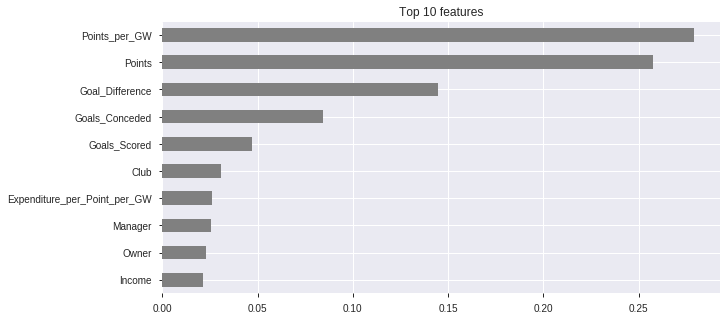

In [192]:

rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [0]:
# observation: Goals Conceded (defense) has a higher importance re Relegation

# Regression Models re Points for 2019 Season

In [0]:
target = 'Points'
features = df.columns.drop([target])

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

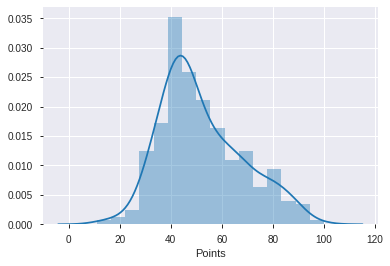

In [195]:
%matplotlib inline
sns.distplot(y_train);

In [196]:
lr = make_pipeline(
    ce.TargetEncoder(),  
    LinearRegression()
)

lr.fit(X_train, y_train)
print('Linear Regression R^2', lr.score(X_val, y_val))

Linear Regression R^2 1.0


In [197]:
coefficients = lr.named_steps['linearregression'].coef_
pd.Series(coefficients, features)

Club                            4.259566e-15
Season                         -1.110223e-16
GW_Played                      -1.625367e-13
Goals_Scored                   -5.870304e-15
Goals_Conceded                  5.856426e-15
Goal_Difference                 6.800116e-15
Expenditure                     1.811051e-12
Income                          1.810177e-12
Net                            -1.811440e-12
Points_per_GW                   3.800000e+01
Expenditure_per_Point_per_GW    2.081668e-16
Manager                         5.551115e-17
Owner                          -3.927414e-15
Champion                        4.043315e-15
Relegated                      -6.704706e-16
dtype: float64

In [198]:

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

Gradient Boosting R^2 0.9992468659614736


Series.base is deprecated and will be removed in a future version
Series.base is deprecated and will be removed in a future version


In [0]:
# Shapley Values

In [0]:
# Assign to X, y
features = ['Points_per_GW', 'Goal_Difference', 'Goals_Scored', 'Goals_Conceded']
target = 'Points'
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [201]:
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_distributions = { 
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
    'max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42), 
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=2, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1, 
    random_state=42
)

search.fit(X_train, y_train);

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s finished


In [202]:

print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
model = search.best_estimator_

Best hyperparameters {'max_depth': 20, 'max_features': 0.9507143064099162, 'n_estimators': 156}
Cross-validation MAE 0.44832775919732426


In [0]:
row = X_test.iloc[[0]]

In [204]:
y_test.iloc[[0]]

0    49
Name: Points, dtype: int64

In [205]:
model.predict(row)

array([90.81410256])

In [206]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [0]:
# Features Importance for Regression Model

In [0]:
df = pd.read_excel(DATA_PATH)

In [0]:
columns = ['Club', 'Season', 'GW_Played', 'Goals_Scored', 'Goals_Conceded', 
           'Goal_Difference', 'Expenditure', 'Income', 'Net', 'Points', 
           'Points_per_GW', 'Expenditure_per_Point_per_GW', 'Manager', 'Owner', 
           'Champion', 'Relegated']

In [0]:
target = 'Points'
features = df.columns.drop([target])

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

In [211]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.2


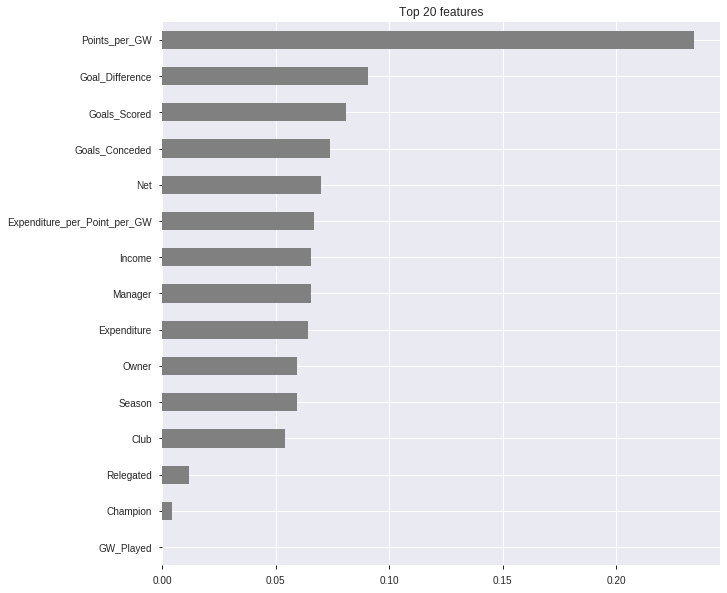

In [212]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [0]:
# Eli5

transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

In [214]:
X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [215]:
# 1. Calculate permutation importances
permuter = PermutationImportance(
    model, 
    scoring='accuracy', 
    n_iter=5, 
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                                     

In [216]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

Net                            -9.000000e-02
Owner                          -8.000000e-02
Goals_Conceded                 -5.000000e-02
Expenditure                    -5.000000e-02
Expenditure_per_Point_per_GW   -1.000000e-02
Club                           -1.000000e-02
Season                          0.000000e+00
GW_Played                       0.000000e+00
Champion                        0.000000e+00
Income                          5.551115e-18
Goals_Scored                    2.000000e-02
Manager                         4.000000e-02
Relegated                       4.000000e-02
Goal_Difference                 6.000000e-02
Points_per_GW                   1.500000e-01
dtype: float64

In [217]:
# 2. Display permutation importances
eli5.show_weights(
    permuter, 
    top=None, # show permutation importances for all features
    feature_names=feature_names # must be a list
)

Weight,Feature
0.1500 ± 0.0632,Points_per_GW
0.0600 ± 0.0748,Goal_Difference
0.0400 ± 0.0400,Relegated
0.0400 ± 0.0748,Manager
0.0200 ± 0.0800,Goals_Scored
0.0000 ± 0.0632,Income
0 ± 0.0000,Champion
0 ± 0.0000,GW_Played
0 ± 0.0000,Season
-0.0100 ± 0.1166,Club


In [218]:
# Use Importances for feature selection

print('Shape before removing features:', X_train.shape)

Shape before removing features: (460, 15)


In [0]:
minimum_importance = 0
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train = X_train[features]

In [220]:
print('Shape after removing features:', X_train.shape)

Shape after removing features: (460, 6)


In [221]:
X_val = X_val[features]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.55


In [0]:
# Gradient Boosting

In [0]:
#columns = ['Club', 'Season', 'GW_Played', 'Goals_Scored', 'Goals_Conceded', 
#           'Goal_Difference', 'Expenditure', 'Income', 'Net', 'Points', 
 #          'Points_per_GW', 'Expenditure_per_Point_per_GW', 'Manager', 'Owner', 
  #         'Champion', 'Relegated']

In [0]:
#target = 'Points'
#features = df.columns.drop([target])

#X_train = train[features]
#y_train = train[target]

#X_val = val[features]
#y_val = val[target]

#X_test = test[features]
#y_test = test[target]

In [225]:
from xgboost import XGBClassifier
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Manager'], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[{'col': 'Manager',
                                          'data_type': dtype('O'),
                                          'mapping': Guardiola       1
Mourinho        2
Pochettino      3
Klopp           4
Sarri           5
             ... 
Ball          133
Merrington    134
Wilkins       135
McFarland     136
NaN            -2
Length: 137, dtype: int64}],
                                return_df=True, verbose=0)),
                ('...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                       

In [226]:

from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

Validation Accuracy 0.8


In [229]:
from scipy.stats import randint, uniform

features = train.columns.drop(target)
X_train = train[features]
y_train = train[target]

pipeline = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(), 
    RandomForestRegressor(random_state=42)
)

param_distributions = {
    'targetencoder__min_samples_leaf': randint(1, 1000), 
    'targetencoder__smoothing': uniform(1, 1000), 
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1), 
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=3, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   17.5s finished
The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.


In [230]:

print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)

Best hyperparameters {'randomforestregressor__max_depth': 15, 'randomforestregressor__max_features': 0.950147671275259, 'randomforestregressor__n_estimators': 402, 'simpleimputer__strategy': 'median', 'targetencoder__min_samples_leaf': 888, 'targetencoder__smoothing': 371.5945845482714}
Cross-validation MAE 0.270295262816353


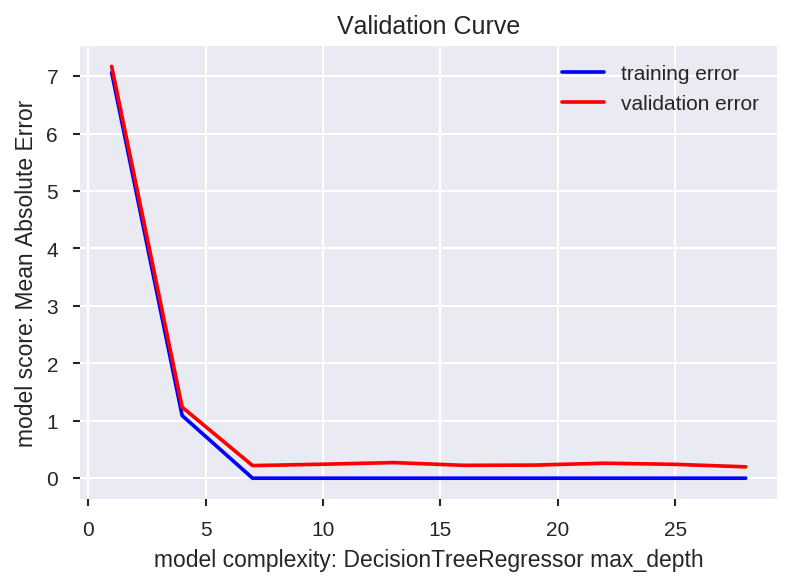

In [237]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(), 
    DecisionTreeRegressor()
)

depth = range(1, 30, 3)
train_scores, val_scores = validation_curve(
    pipeline, X_train, y_train,
    param_name='decisiontreeregressor__max_depth', 
    param_range=depth, scoring='neg_mean_absolute_error', 
    cv=3,
    n_jobs=-1
)

plt.figure(dpi=150)
plt.plot(depth, np.mean(-train_scores, axis=1), color='blue', label='training error')
plt.plot(depth, np.mean(-val_scores, axis=1), color='red', label='validation error')
plt.title('Validation Curve')
plt.xlabel('model complexity: DecisionTreeRegressor max_depth')
plt.ylabel('model score: Mean Absolute Error')
plt.legend();

In [0]:
!pip install pandas_profiling

In [241]:
import pandas_profiling

profile_report = train.profile_report(
    check_correlation_pearson=False,
    correlations={
        'pearson': False,
        'spearman': False,
        'kendall': False,
        'phi_k': False,
        'cramers': False,
        'recoded': False,
    },
    plot={'histogram': {'bayesian_blocks_bins': False}},
)

profile_report